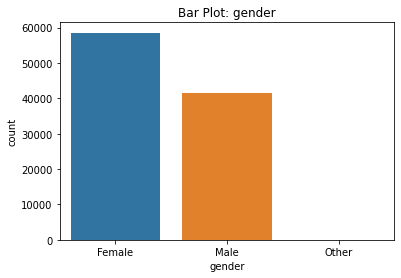

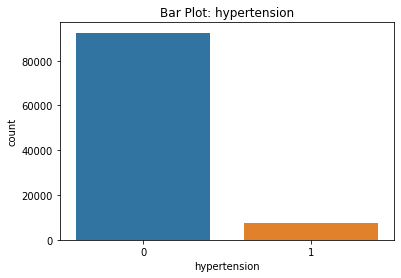

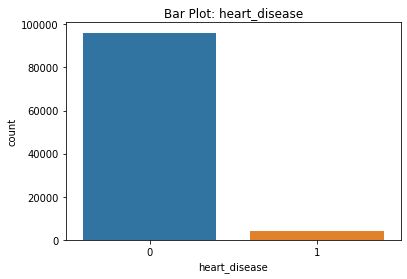

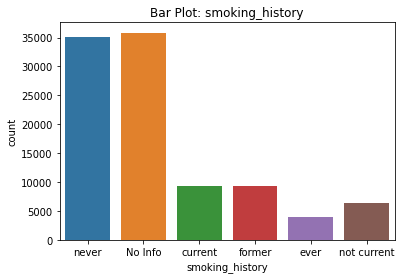

In [65]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("diabetes_prediction_dataset.csv")

#print(data.describe())
    
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for var in categorical_variables:
    plt.figure()
    sns.countplot(x=var, data=data)
    plt.title(f'Bar Plot: {var}')
    plt.show()

In [66]:
data.drop('hypertension', axis=1, inplace=True)
data.drop('heart_disease', axis=1, inplace=True)
data = data[data['gender'] != 'Other']
print(data.shape[0])

99982


In [67]:
def encode_categorical_with_label_encoding(data):
    le = LabelEncoder()
    categorical_columns = ['gender', 'smoking_history']
    for col in categorical_columns:
        data[col] = le.fit_transform(data[col])
    return data

def encode_categorical_with_one_hot_encoding(data):
    categorical_columns = ['gender',  'smoking_history']

    for col in categorical_columns:
        encoded_data = pd.get_dummies(data[col])
        data = pd.concat([data, encoded_data], axis=1)
        data = data.drop(col, axis=1)
    return data
    

In [55]:
#Sa label encodingom
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Split the dataset into features (X) and the target variable (y)
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target variable

X = encode_categorical_with_label_encoding(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

#SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
# Use the trained model to predict the diabetes type for the test set
y_pred = svm_classifier.predict(X_test)

from sklearn.metrics import f1_score

# Calculate the micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)


Micro F1 Score: 0.960294044106616


In [35]:
#Sa one-hot encodingom
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Split the dataset into features (X) and the target variable (y)
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target variable

X = encode_categorical_with_one_hot_encoding(X)
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
svm_classifier = SVC()

# Train the model using the training data
svm_classifier.fit(X_train, y_train)

# Use the trained model to predict the diabetes type for the test set
y_pred = svm_classifier.predict(X_test)

from sklearn.metrics import f1_score

# Calculate the micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)


Micro F1 Score: 0.9452417862679402


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Split the dataset into features (X) and the target variable (y)
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target variable

X = encode_categorical_with_label_encoding(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

#SVM

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import uniform, loguniform

# Define the hyperparameter search space
param_grid = {
    'C': loguniform(1e-4, 1e4),
    'gamma': loguniform(1e-4, 1e4),
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Create the SVC classifier
svc = SVC()

# Create a scorer based on the micro F1 measure
scorer = make_scorer(f1_score, average='micro')

# Perform random search for hyperparameter optimization
random_search = RandomizedSearchCV(svc, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the predicted labels using the best model
y_pred = random_search.predict(X_test)

# Calculate the micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)


KeyboardInterrupt: 

In [ ]:
#kNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Split the dataset into features (X) and the target variable (y)
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target variable

X = encode_categorical_with_one_hot_encoding(X)
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Create a kNN classifier object
knn_classifier = KNeighborsClassifier()

# Train the model using the training data
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

from sklearn.metrics import f1_score

# Calculate the micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)


In [64]:
#optimizacija kNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Split the dataset into features (X) and the target variable (y)
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target variable

X = encode_categorical_with_one_hot_encoding(X)
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint

# Define the hyperparameter search space
param_grid = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the kNN classifier
knn = KNeighborsClassifier()

# Create a scorer based on the micro F1 measure
scorer = make_scorer(f1_score, average='micro')

# Perform random search for hyperparameter optimization
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the predicted labels using the best model
y_pred = random_search.predict(X_test)

# Calculate the micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)


Best Hyperparameters: {'algorithm': 'kd_tree', 'n_neighbors': 6, 'weights': 'uniform'}
Micro F1 Score: 0.9607441116167426


In [ ]:
#logisticka regresija
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split the dataset into features (X) and the target variable (y)
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target variable

X = encode_categorical_with_one_hot_encoding(X)
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Create a logistic regression classifier object
logreg_classifier = LogisticRegression()

# Train the model using the training data
logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)

from sklearn.metrics import f1_score

# Calculate the micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)

In [68]:
#optimizacija logisticke (hiperparametri)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split the dataset into features (X) and the target variable (y)
X = data.drop("diabetes", axis=1)  # Features
y = data["diabetes"]  # Target variable

X = encode_categorical_with_one_hot_encoding(X)
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import uniform

# Define the hyperparameter search space
param_grid = {
    'C': uniform(loc=0, scale=10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the logistic regression classifier
logreg = LogisticRegression()

# Create a scorer based on the micro F1 measure
scorer = make_scorer(f1_score, average='micro')

# Perform random search for hyperparameter optimization
random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, scoring=scorer, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the predicted labels using the best model
y_pred = random_search.predict(X_test)

# Calculate the micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)


c:\users\saška\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\saška\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\saška\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\saška\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\saška\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

Best Hyperparameters: {'C': 0.6465976998829948, 'penalty': 'l2', 'solver': 'saga'}
Micro F1 Score: 0.9588438265739861


c:\users\saška\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
